In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Activation functions
def ReLU(x):
    return x * (x > 0)

def Sig(x):
    return 1/(1+np.exp(-x))

In [3]:
# data preprocessing
xtest = np.loadtxt('xtest.txt', delimiter=',')
xtest = xtest/255

In [4]:
# Loading Weights
W0 = np.loadtxt('W0.txt', delimiter=',')
W1 = np.loadtxt('W1.txt', delimiter=',')
W2 = np.loadtxt('W2.txt', delimiter=',')

# Loading Biases
B0 = np.loadtxt('B0.txt', delimiter=',')
B1 = np.loadtxt('B1.txt', delimiter=',')
B2 = np.loadtxt('B2.txt', delimiter=',')

In [5]:
# First Hidden calculations
h0 = xtest.dot(W0)+ B0 
h0 = ReLU(h0)

# Second Hidden calculations

h1 = h0.dot(W1) + B1
h1 = ReLU(h1)

# output calculations
O = h1.dot(W2) + B2
O = Sig(O)
O = np.argmax(O, axis = 1)

In [6]:
# Find mislabeld 
ytest = np.loadtxt('ytest.txt', delimiter=',')
k = 0
bad_labels = []
for i in range(10000):
    if O[i,]!=ytest[i,]:
        #print(i)
        bad_labels.append(i)
        k = k + 1

In [7]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix        
cm = confusion_matrix(O, ytest)
print(cm)

[[ 968    0    2    0    1    1    2    1    6    2]
 [   1 1124    1    0    1    0    2    4    0    3]
 [   1    3 1020    3    2    0    0    9    4    0]
 [   1    1    0  977    1    2    0    0    2    1]
 [   1    0    1    0  964    1    1    0    5    6]
 [   2    1    0   14    0  879    1    0   12    6]
 [   4    4    2    0    6    8  952    0   17    1]
 [   2    1    5    5    1    1    0 1010    4    7]
 [   0    1    1    1    1    0    0    1  918    1]
 [   0    0    0   10    5    0    0    3    6  982]]


In [10]:
# Accuracy
accuracy = cm.trace() / cm.sum() * 100 
print('accuracy', accuracy, '%')

accuracy 97.94 %


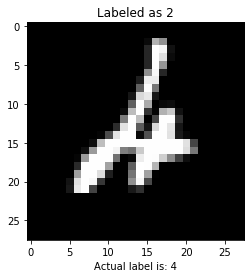

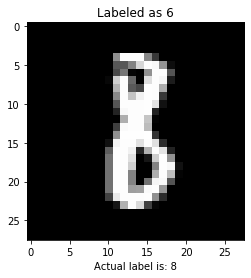

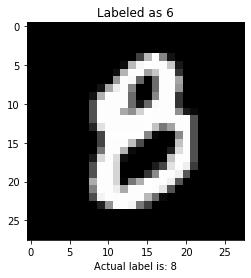

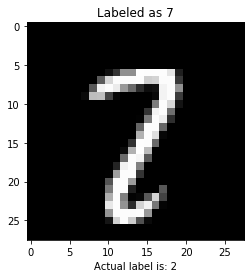

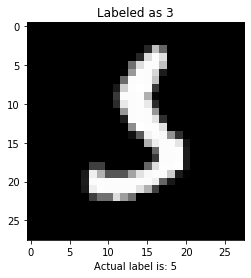

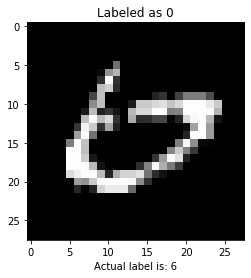

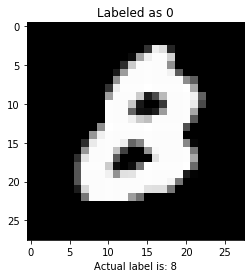

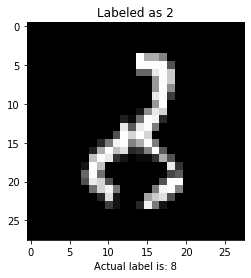

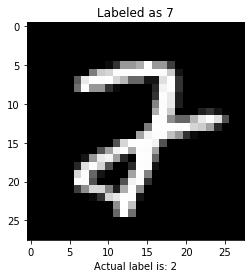

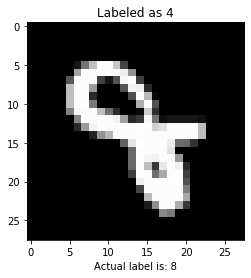

In [9]:
#plot first 10 bad images
for i in range(10):
    k = bad_labels[i]
    # ploting some bad figures
    x_test = xtest[k,] * 255
    #x_test = open('xtest.txt','r+').readlines()[k].split(',')

    # predicted label
    pred_label = O[k]
    # actual label
    actual_label = int(ytest[k])

    # Make those columns into a array of 8-bits pixels
    # This array will be of 1D with length 784
    # The pixel intensity values are integers from 0 to 255 
    #Actually not needed here when not using read.lines()
    pixels = np.array(x_test, dtype='uint8')

    # Reshape the array into 28 x 28 array (2-dimensional array)
    pixels = pixels.reshape((28, 28))

    # Plot
    plt.title('Labeled as {pred_label}'.format(pred_label=pred_label))
    plt.imshow(pixels, cmap='gray')
    plt.xlabel('Actual label is: {actual_label}'.format(actual_label = actual_label))
    plt.show()